In [35]:
import pandas as pd
import numpy as np
import math 

In [36]:
data=pd.read_csv('1.csv')
data_train=data[:int(data.shape[0]*(8/10))]
data_test=data[int(data.shape[0]*(8/10)):]

# Decision tree from scratch.

In [37]:
def getEntropy(d):
  ent=0
  for i in d['class'].value_counts():
    ent-=i*np.log2(i/d.shape[0])/d.shape[0]
  return ent

In [38]:
def gain(d,f):
  rel_cap_shape_gain=getEntropy(d)
  vc=d[f].value_counts();
  for i in d[f].value_counts().index:
    rel_cap_shape_gain-=vc[i]*getEntropy(d[d[f]==i])/d.shape[0]
  return rel_cap_shape_gain

In [39]:
class Node:
  def __init__(self):
    self.fromFeatureVal=[]
    self.name=None
    self.child=[]

In [40]:
def buildTree(root,d,depth):
    if d['class'].value_counts().shape[0]==1:
        root.name='leaf'+' '+list(d['class'].value_counts().index)[0]
        return
    if(depth==0):
        ec= d['class'].value_counts()[0]
        pc= d['class'].value_counts()[1]
        if(ec>=pc):
            root.name='leaf e'
        else:
            root.name='leaf p'
        return
    maxGain=-100000000
    for i in d.columns:
        if(i!='class' and gain(d,i)>maxGain):
            maxGain=gain(d,i)
            feature=i
    root.name=feature
    for i in d[feature].value_counts().index:
        r=Node()
        r.fromFeatureVal.append(i)
        buildTree(r,d[d[feature]==i].drop(columns=[feature]),depth-1)
        root.child.append(r)
    #Combining leave nodes
    e=Node()
    e.name='leaf e'
    p=Node()
    p.name='leaf p'
    iter=root.child.copy()
    for i in iter:
        if i.name=='leaf e':
            e.fromFeatureVal.append(i.fromFeatureVal[0])
            root.child.remove(i)
        if i.name=='leaf p':
            p.fromFeatureVal.append(i.fromFeatureVal[0])
            root.child.remove(i)
    if(len(e.fromFeatureVal)!=0): 
        root.child.append(e)
    if(len(p.fromFeatureVal)!=0): 
        root.child.append(p)
    return


In [41]:
def rep(root,s):
  print(s,root.fromFeatureVal," ",root.name)
  for i in root.child:
    rep(i,s+"     ")

In [42]:
def predict(root,t1):
    if 'leaf' in root.name:
        return root.name
    for i in root.child:
        if list(t1[root.name])[0] in i.fromFeatureVal:
            return predict(i,t1)

## Without Dropping '?'

In [43]:
root=Node()
root.fromFeatureVal.append('root')
buildTree(root,data_train,10)
rep(root,"")

 ['root']   odor
      ['n']   spore-print-color
           ['w']   habitat
                ['l']   cap-color
                     ['c', 'n']   leaf e
                     ['w']   leaf p
                ['w', 'g', 'p']   leaf e
                ['d']   leaf p
           ['n', 'k', 'h', 'o', 'y']   leaf e
           ['r']   leaf p
      ['a', 'l']   leaf e
      ['f', 'p', 'y', 's', 'c', 'm']   leaf p


In [44]:
pred=[]
for i in data_test.index:
    t1=data_test.loc[i,:].to_frame().T
    pred.append(predict(root , t1))
correct=0
for i,j in zip(pred,data_test['class']):
    if isinstance(i,str):
        if j in i:
            correct+=1
print(correct, " out of ",data_test.shape[0]," correct")
print("Acuuracy: ",correct/data_test.shape[0])

1569  out of  1625  correct
Acuuracy:  0.9655384615384616


## Checking for '?'



In [45]:
for i in data.columns:
  if '?' in list(data[i].value_counts().index):
    print(i)
    print(data[i].value_counts()['?'])

stalk-root
2480


## Dropping Column

In [46]:
dataCD=data.drop('stalk-root',axis=1)

In [47]:
dataCD_train=dataCD[:int(dataCD.shape[0]*(8/10))]
dataCD_test=dataCD[int(dataCD.shape[0]*(8/10)):]
rootCD=Node()
rootCD.fromFeatureVal.append('root')
buildTree(rootCD,dataCD_train,10)
rep(rootCD,"")

 ['root']   odor
      ['n']   spore-print-color
           ['w']   habitat
                ['l']   cap-color
                     ['c', 'n']   leaf e
                     ['w']   leaf p
                ['w', 'g', 'p']   leaf e
                ['d']   leaf p
           ['n', 'k', 'h', 'o', 'y']   leaf e
           ['r']   leaf p
      ['a', 'l']   leaf e
      ['f', 'p', 'y', 's', 'c', 'm']   leaf p


In [48]:
predCD=[]
for i in dataCD_test.index:
    t1=dataCD_test.loc[i,:].to_frame().T
    predCD.append(predict(rootCD , t1))
correct=0
for i,j in zip(predCD,dataCD_test['class']):
    if isinstance(i,str):
        if j in i:
            correct+=1
print(correct, " out of ",dataCD_test.shape[0]," correct")
print("Accuracy: ",correct/dataCD_test.shape[0])

1569  out of  1625  correct
Accuracy:  0.9655384615384616


## Droping Rows
 

In [49]:
dataRD=data[data['stalk-root']!='?']
dataRD_train=dataRD[:int(dataRD.shape[0]*(8/10))]
dataRD_test=dataRD[int(dataRD.shape[0]*(8/10)):]
rootRD=Node()
rootRD.fromFeatureVal.append('root')
buildTree(rootRD,dataRD_train,10)
rep(rootRD,"")

 ['root']   odor
      ['n']   cap-shape
           ['x', 'f', 's', 'k']   leaf e
           ['b']   leaf p
      ['a', 'l']   leaf e
      ['f', 'p', 'c']   leaf p


In [50]:
predRD=[]
for i in dataRD_test.index:
    t1=dataRD_test.loc[i,:].to_frame().T
    predRD.append(predict(rootRD , t1))
correct=0
for i,j in zip(predRD,dataRD_test['class']):
    if isinstance(i,str):
        if j in i:
            correct+=1
print(correct, " out of ",dataRD_test.shape[0]," correct")
print("Accuracy: ", correct/dataRD_test.shape[0])

1045  out of  1129  correct
Accuracy:  0.9255978742249779


# Inbuilt-Decision Tree from sklearn.

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Without removing ?


In [52]:
X=data.iloc[:,1:]
y=data.iloc[:,:1]
ohe=OneHotEncoder()
X_e=ohe.fit_transform(X)
le=LabelEncoder()
y_e=le.fit_transform(y.values.ravel())
X_train,X_test,y_train,y_test=train_test_split(X_e,y_e,test_size=0.3)
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
y_pred_e=dtc.predict(X_test)
np.count_nonzero(y_pred_e==y_test)/len(y_test)

1.0

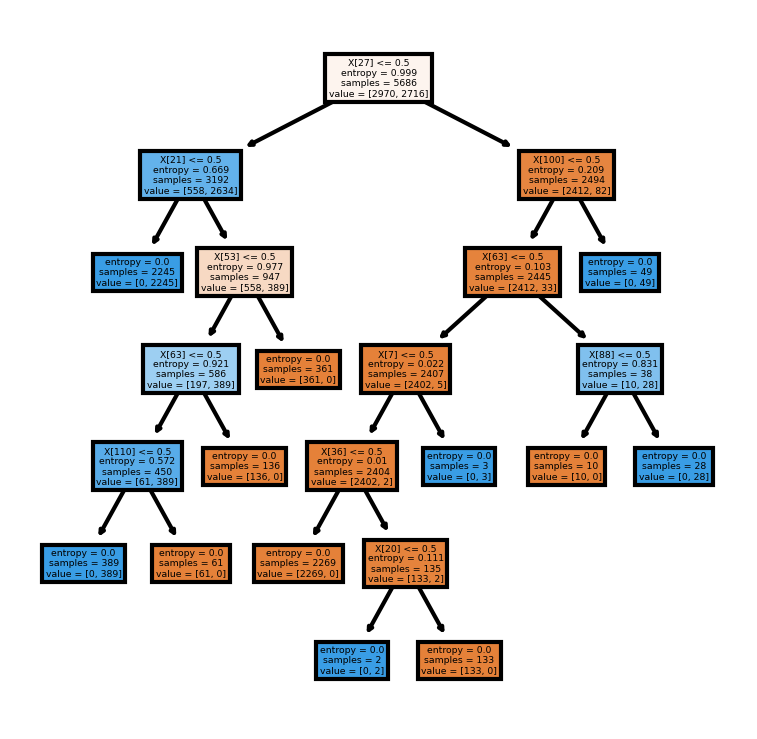

In [53]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dtc,filled = True);

In [54]:
dtc.tree_.node_count

23

## Removing column containg ?

In [55]:
X=data.iloc[:,1:]
X.drop('stalk-root',axis=1)
y=data.iloc[:,:1]
ohe=OneHotEncoder()
X_e=ohe.fit_transform(X)
le=LabelEncoder()
y_e=le.fit_transform(y.values.ravel())
X_train,X_test,y_train,y_test=train_test_split(X_e,y_e,test_size=0.3)
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
y_pred_e=dtc.predict(X_test)
np.count_nonzero(y_pred_e==y_test)/len(y_test)

1.0

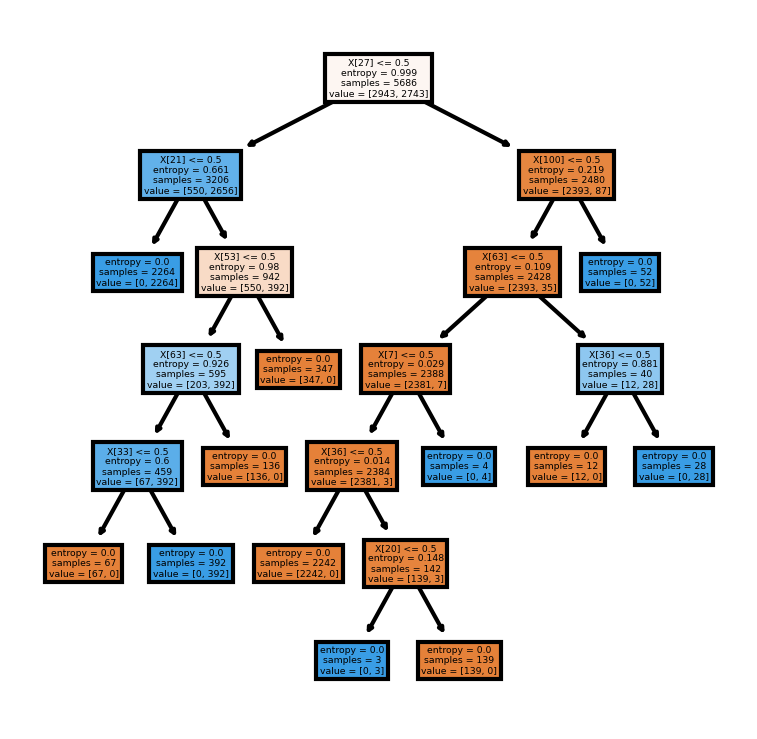

In [56]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dtc,filled = True);

In [57]:
dtc.tree_.node_count

23

## Removing rows contaning ?

In [58]:
dataRD=data[data['stalk-root']!='?']
X=dataRD.iloc[:,1:]
y=dataRD.iloc[:,:1]
ohe=OneHotEncoder()
X_e=ohe.fit_transform(X)
le=LabelEncoder()
y_e=le.fit_transform(y.values.ravel())
X_train,X_test,y_train,y_test=train_test_split(X_e,y_e,test_size=0.3)
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
y_pred_e=dtc.predict(X_test)
np.count_nonzero(y_pred_e==y_test)/len(y_test)

1.0

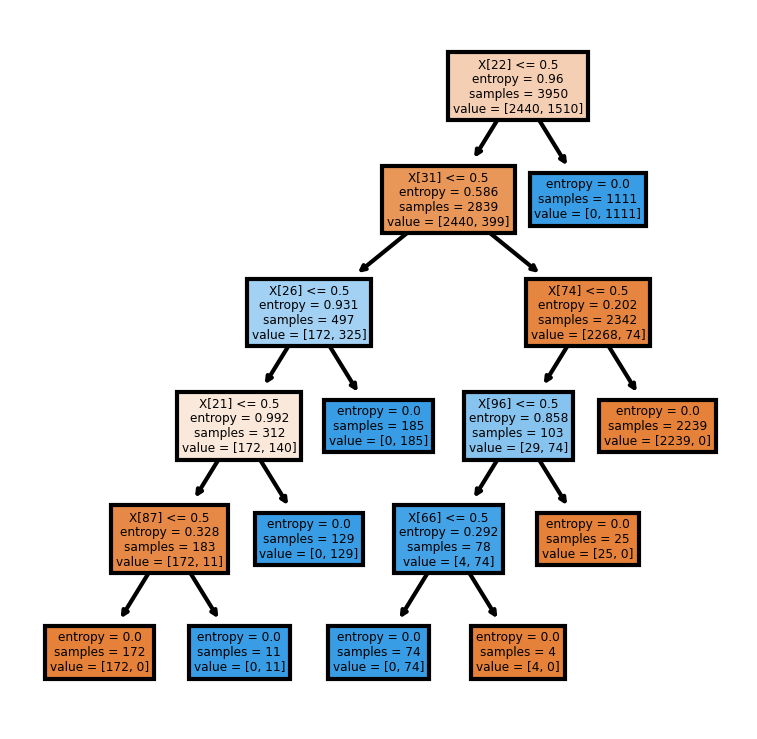

In [59]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dtc,filled = True);

In [60]:
dtc.tree_.node_count

17

# Avoiding overfitting by choosing max depth of 3

## In Decision tree from scratch

In [61]:
root3=Node()
rootCD.fromFeatureVal.append('root')
buildTree(root3,data_train,3)
rep(root3,"")

 []   odor
      ['n']   spore-print-color
           ['w']   habitat
                ['w', 'l', 'g', 'p']   leaf e
                ['d']   leaf p
           ['n', 'k', 'h', 'o', 'y']   leaf e
           ['r']   leaf p
      ['a', 'l']   leaf e
      ['f', 'p', 'y', 's', 'c', 'm']   leaf p


In [62]:
pred=[]
for i in data_test.index:
    t1=data_test.loc[i,:].to_frame().T
    pred.append(predict(root3 , t1))
correct=0
for i,j in zip(pred,data_test['class']):
    if isinstance(i,str):
        if j in i:
            correct+=1
print(correct, " out of ",data_test.shape[0]," correct")
print("Acuuracy: ",correct/data_test.shape[0])

1569  out of  1625  correct
Acuuracy:  0.9655384615384616


## In sklearn decision tree

In [63]:
X=data.iloc[:,1:]
y=data.iloc[:,:1]
ohe=OneHotEncoder()
X_e=ohe.fit_transform(X)
le=LabelEncoder()
y_e=le.fit_transform(y.values.ravel())
X_train,X_test,y_train,y_test=train_test_split(X_e,y_e,test_size=0.3)
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc.fit(X_train,y_train)
y_pred_e=dtc.predict(X_test)
np.count_nonzero(y_pred_e==y_test)/len(y_test)

0.9626743232157506

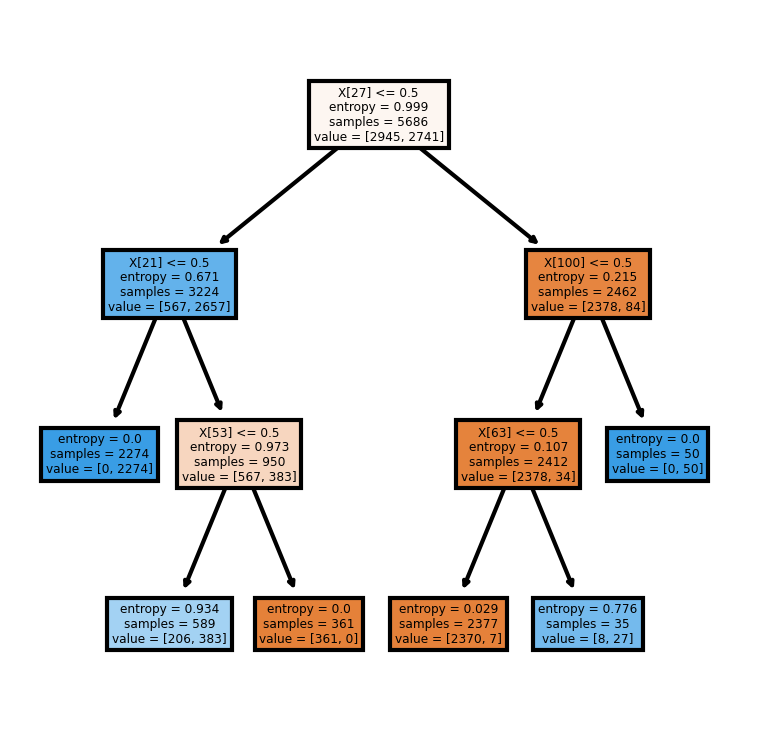

In [64]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dtc,filled = True);

In [65]:
dtc.tree_.node_count

11